<a href="https://colab.research.google.com/github/shirishbahirat/artificial-intelligence/blob/master/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

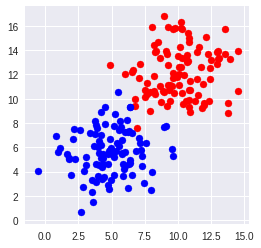

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    
n_pts=100
np.random.seed(0)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts)]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts)]).T
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
plt.show()

[[0.00880295]
 [0.12823766]
 [0.09955707]
 [0.01372204]
 [0.067494  ]
 [0.02485266]
 [0.05783959]
 [0.10752849]
 [0.01790212]
 [0.01982865]
 [0.01687491]
 [0.01953267]
 [0.08305404]
 [0.01653317]
 [0.06356942]
 [0.03244615]
 [0.01869352]
 [0.07519977]
 [0.03714468]
 [0.04724971]
 [0.12539518]
 [0.10048323]
 [0.03716405]
 [0.03450275]
 [0.0422208 ]
 [0.11779179]
 [0.08213426]
 [0.01946251]
 [0.02223247]
 [0.0273059 ]
 [0.09770069]
 [0.03809842]
 [0.13321197]
 [0.1267547 ]
 [0.10757609]
 [0.03783167]
 [0.02670777]
 [0.04586325]
 [0.05613233]
 [0.14016312]
 [0.22501118]
 [0.08020485]
 [0.1058204 ]
 [0.01936312]
 [0.01530217]
 [0.03969957]
 [0.17366009]
 [0.02203358]
 [0.24355157]
 [0.09180481]
 [0.09161742]
 [0.01705515]
 [0.12192247]
 [0.16121167]
 [0.06787429]
 [0.0826482 ]
 [0.02888137]
 [0.1125418 ]
 [0.16205141]
 [0.09548502]
 [0.11081993]
 [0.01970751]
 [0.04568011]
 [0.11197017]
 [0.12862563]
 [0.0418729 ]
 [0.2062352 ]
 [0.14139238]
 [0.04036068]
 [0.05008562]
 [0.02567474]
 [0.04

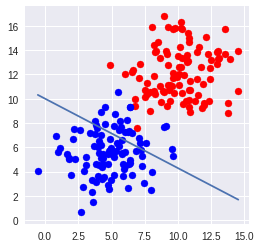

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 

def draw(x1,x2):
  ln=plt.plot(x1,x2)
 
def sigmoid(score):
  return 1/(1+np.exp(-score))
  
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))
w1=-0.2
w2=-0.35
b=3.5
line_paramters = np.matrix([w1,w2,b]).T
x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
x2= -b/w2 + (x1*(-w1/w2))
 
linear_combination= all_points*line_paramters 
probabilities= sigmoid(linear_combination)
print(probabilities)    
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
draw(x1,x2)
plt.show()

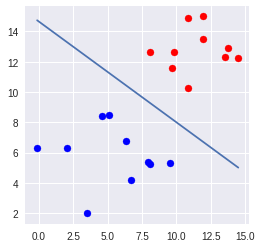

[[0.37438506]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
 
def draw(x1,x2):
  ln=plt.plot(x1,x2)
 
def sigmoid(score):
  return 1/(1+np.exp(-score))
 
def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy
  
n_pts=10
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))
w1=-0.1
w2=-0.15
b=2.2
line_parameters = np.matrix([w1,w2,b]).T
x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
x2= -b/w2 + (x1*(-w1/w2))
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
 
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
draw(x1,x2)
plt.show()
 
print((calculate_error(line_parameters, all_points, y)))

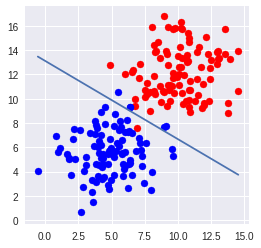

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def draw(x1,x2):
  ln=plt.plot(x1,x2)
def sigmoid(score):
  return 1/(1+np.exp(-score))
def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy
def gradient_descent(line_parameters, points, y , alpha):
  n=points.shape[0]
  for i in range(2000):
    p=sigmoid(points*line_parameters)
    gradient= points.T*(p-y)*(alpha/n)
    line_parameters = line_parameters - gradient
    
    w1=line_parameters.item(0)
    w2=line_parameters.item(1)
    b=line_parameters.item(2)
    
    x1=np.array([points[:,0].min(), points[:,0].max()])
    x2= -b/w2 + (x1*(-w1/w2))
  draw(x1,x2) 
  
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))
 
line_parameters = np.matrix([np.zeros(3)]).T
# x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
# x2= -b/w2 + (x1*(-w1/w2))
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
 
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()
